# PIC16A Final Exam, Problem 1 (55 points)

### *Spring 2021*

## Academic Integrity Statement

As a matter of Departmental policy, **we are required to give you a 0** unless you **type your name** after the following statement: 

> *I certify on my honor that I have neither given nor received any help, or used any non-permitted resources, while completing this evaluation.*

- David Nguyen

## Permitted Resources

This exam is open-book, open-notes, open-internet, open-everything. The only thing you are not allowed to do is ask another human being for help, with the exception of me. Examples: 

1. **Permitted**: Checking course notes and videos; browsing Google or StackOverflow; consulting previous Campuswire posts. 
2. **Not permitted**: Requesting help on Chegg; publicly posting on Campuswire (messages to me are ok); privately asking classmates for help; posting on StackOverflow. 

If you encounter any situation in which you're not 100% sure what's permitted, **just ask**! 


### Partial Credit

Let us give you partial credit! If you're stuck on a problem and just can't get your code to run: 

First, **breathe**. Then, do any or all of the following: 
    
1. Write down everything relevant that you know about the problem, as comments where your code would go. 
2. If you have non-functioning code that demonstrates some correct ideas, indicate that and keep it (commented out). 
3. Write down pseudocode (written instructions) outlining your solution approach. 

In brief, even if you can't quite get your code to work, you can still **show us what you know.**

# Introduction

This problem is based on the article 

> Obermeyer, Z., Powers, B., Vogeli, C., & Mullainathan, S. (2019). Dissecting racial bias in an algorithm used to manage the health of populations. *Science*, 366(6464), 447-453.

In this article, the authors use patient medical records, demographics, and insurance claims to study bias in a machine learning model used to predict patient risk. This model has been used to make recommendations about which patients should be admitted to more intensive care programs on the basis of their health. 

In this problem, you will replicate several of the qualitative findings from this study. 

The results presented in this article were discussed by Dr. Ruha Benjamin in the video "[Are We Automating Racism](https://www.youtube.com/watch?v=Ok5sKLXqynQ)," which was one of the videos we watched as part of our discussion of algorithmic bias in Week 8. You are free to consult either the article or the video when completing this assignment. While doing so may be interesting, it is not likely to concretely help you in the problems below.




## Data Access

In order to protect patient privacy, the authors did not share the "real" data used in their study. Instead, they created a randomized version of the data that preserves many of the same patterns and trends. Run the cell below to access the data. I have also uploaded the CSV file directly to CCLE in case you have issues using this URL. 

In [1]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

There are 48,784 patients represented as rows in the data, and 160 pieces of information about each patient represented as columns. Run the code below to check this: 

In [2]:
df.shape

(48784, 160)

A few of the columns are going to be especially important in our analysis: 

- `risk_score_t` is the algorithm's risk score assigned to a given patient. 
- `cost_t` is the patient's medical costs in the study period. 
- `race` is the patient's self-reported race. The authors filtered the data to include only `white` and `black` patients. 
- `gagne_sum_t` is the total number of chronic illnesses presented by the patient during the study period. 
- `dem_female` is a patient sex indicator, with `1` indicating female patients and `0` indicating male patients. 

Run the code below to take a look at these columns. 

In [3]:
cols = ['risk_score_t', 'cost_t', 'gagne_sum_t','race',  'dem_female']
df[cols].head()

,risk_score_t,cost_t,gagne_sum_t,race,dem_female
0,1.987430,1200.0,0,white,0
1,7.677934,2600.0,3,white,1
2,0.407678,500.0,0,white,1
3,0.798369,1300.0,0,white,1
4,17.513165,1100.0,1,white,1


# Part A (20 points)

Here's how the algorithm was used in the medical setting: 

> Patients with higher scores from the algorithm were more likely to be enrolled in “high-risk care management” programs. 

A high-risk care management program offers additional health resources to patients, including trained healthcare providers to help them manage complex health needs. In other words, 

> If you are very sick, getting a **high** score on the algorithm can help you receive **more** medical attention. 

One of the major findings of the study above was that the algorithm tended to give lower scores to Black patients, even when those Black patients were equally sick as White patients. In this part, you will replicate this finding. 

**To do so, create the following plot:** 

<figure class="image" style="width:70%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/_images/risk1.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

#### Key Points

- **The vertical axis gives the *percentile risk* of patients assigned by the algorithm, rounded to the nearest percentage point**. A patient in the 85th percentile, for example, received a risk score from the algorithm higher than 84% of all patients and lower than 15% of all patients. The raw risk score (not the percentile) of each patient is contained in the `risk_score_t` column. 
- **The horizontal axis gives the average number of chronic illnesses presented by patients in the corresponding risk percentile**. For example, White men in the 80th risk score percentile presented, on average, approximately two chronic illnesses. The number of chronic illnesses presented by a patient is contained in the `"gagne_sum_t"` column of the data. 
- Different colors segment Black and White patients (`race`). Two panels distinguish between male and female patients. The `dem_female` column gives the sex of each patient, with `0` representing male and `1` representing female.  

### Specs

Please attend to the following details:

- It is important that you **round the percentile risk scores to the nearest percentile**, and compute the average number of conditions within each rounded percentile. This means that, for example, there should be 101 data points  (percentiles 0%-100%) corresponding to Black women, 101 other data points corresponding to White women, etc. Failure to round and compute the mean will result in your plot containing an unreadable number of points. 
- The horizontal axis, vertical axis, and axis titles are all appropriately ***capitalized***: the first letter of the first word is capitalized. 
- The legend title, as well as the legend entries, are also appropriately capitalized. 
- Beyond these specs, you are free to modify the colors, transparency, etc, and get creative with the text. You are not required to replicate the exact size or aspect ratio of the figure. 

### Hints

- The only columns you need to work with in this problem are: `risk_score_t`, `race`, `gagne_sum_t` (containing the number of chronic illnesses per patient), and `dem_female`
- The plotting aspect problem can be solved using either standard `matplotlib` or `seaborn`. Correct approaches using either set of tools will receive full credit. 
- The percentiles of an data frame column `df["x"]` can be computed by `df["x"].rank()/len(df)`. The results will be values between 0 and 1. One should then multiply by 100 and `round()` the results to obtain the percentiles as integers between 0 and 100. 
- To compute the mean number of chronic illnesses per percentile, group by the integer percentiles (as well as race and sex) and then compute the `mean` of the `gagne_sum_t` column. 
- The plotted points should correspond to *average* number of chronic conditions, *grouped by* percentiles and demographic variables. 

In [45]:
#import matplotlib
from matplotlib import pyplot as plt
import numpy as np


In [458]:
# feel free to use this cell for "scratchwork" (e.g. data exploration). 
# Place your actual solution in the cell below


In [226]:
#make dataframe with columns we need 
data = df[['risk_score_t', 'gagne_sum_t','race',  'dem_female']]
#find percentiles for each patient (percentiles rounded to whole numbers) 
data['percentile'] = round((data['risk_score_t'].rank() / len(data)) * 100)

<ipython-input-226-c07ddeea0d13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['percentile'] = round((data['risk_score_t'].rank() / len(data)) * 100)


In [504]:
#separate by gender
data_m = data[data['dem_female'] == 0]
data_f = data[data['dem_female'] == 1]
#separate by race
data_m_b = data_m[data_m['race'] == 'black']
data_m_w = data_m[data_m['race'] == 'white']
data_f_b = data_f[data_f['race'] == 'black']
data_f_w = data_f[data_f['race'] == 'white']

In [640]:
def clean_data(data, name):
    '''
    returns series that with multiindex race and sex
    '''
    sort = data.drop(['risk_score_t', 'race', 'dem_female'], axis = 1)
    sort = sort.groupby(['percentile']).aggregate([np.mean])
    sort = sort.rename(columns={'gagne_sum_t': str(name[0]), 'mean': str(name[1])})
    return sort 

In [785]:
groups = [data_m_b, data_m_w, data_f_b, data_f_w]
names = [['male','black'], ['male','white'], ['female','black'],['female','white']]
clean_group = [clean_data(groups[n],names[n]) for n in range(4)]
d1 = pd.concat(clean_group, axis = 1)

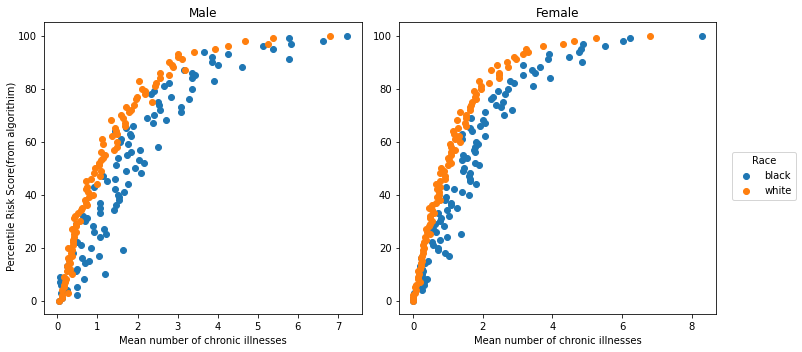

In [806]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(10, 5)

#plots
p1 = ax[0].scatter(d1['male', 'black'], d1.index, label = 'black')
p2 = ax[0].scatter(d1['male', 'white'], d1.index, label = 'white')
p3 = ax[1].scatter(d1['female', 'black'], d1.index, label = 'black')
p4 = ax[1].scatter(d1['female', 'white'], d1.index, label = 'white')

ax[0].set(xlabel = 'Mean number of chronic illnesses', title = 'Male')
ax[1].set(xlabel = 'Mean number of chronic illnesses', title = 'Female')
plt.tight_layout()


fig.text(0.0, 0.5, 'Percentile Risk Score(from algorithim)', 
         va='center', rotation='vertical')
fig.legend(handles=[p1, p2], title='Race', bbox_to_anchor=(1, 0.5), loc='center left')

# Part B (5 points)

In no more than four sentences, describe the meaning of the plot you produced in Part A. For example, suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program? 

Looking at our plots, a trend that we can see with both genders is that black patients will be given a lower risk score despite having the same number of chronic illnesses as their white counterparts as the plots for black patients is lower on the percentile risk score. If patient A was black and patient B was white, patient A would be less likely to be referred to a high risk managemnet program. 


# Part C (30 points)

Next, you'll perform an analysis to identify the source of this disparity in Black and White patients. You might imagine that the model was trained to base its risk scores on an "overall level of health" in the training data. However, it is very difficult to get data on such a concept. 

For this reason, the algorithm studied was trained instead using *total medical costs* as the target variable. That is: 

> The risk score an agent receives is a function of the model's prediction of the total medical costs which will be incurred by that individual. 

This is a superficially logical choice, since (a) total medical costs are generally correlated with health and (b) costs are regularly recorded in insurance claims data. 

In this problem, you'll use linear regression to estimate the difference in generated medical costs between White and Black patients in this data set, and comment on this result in the context of Part A and B. 

### What You Should Do

1. If you modified the data frame `df` in any way, you should re-run the code in which you load the data frame. 
2. Run the supplied cell in order to limit the columns in the data frame to the ones you will use in this analysis. 
3. The `race` column of the data is currently a string. Encode it using integer labels. 
4. Partition the data into a target data `y` consisting of the `cost_t` column of `df`. Let the predictor data `X` contain all other columns, excluding `cost_t`. 
5. Perform a train-test split of `X` and `y`, using 20% of the data as test data. Please pass the argument `random_state = 2021` to your split function in order to ensure reproducibility. **Important**: you should do this using only one function call. 
6. Create a **linear** regression model and fit it to the training data. Evaluate the `score` of the model on the training and testing data. Here are the scores that I got -- it's ok if yours are a little different. 
    - Training score: `0.12629789734544883`
    - Testing score: `0.12415443228313183`
7. Based these results, comment on whether you are concerned about overfitting. **Note**: these are not "accuracy" scores but rather "coefficient of determination" scores. They are relatively low, but low scores on statistical tasks are common in medical and biological applications. 
8. Examine the `coef_` attribute of the fitted linear regression model. The `race` column is the first one in the data frame. This means that the very first entry of the `coef_` array gives the model's estimate of the difference in costs between White and Black patients when controlling for sex, age, and medical conditions. Here's what I got -- it's ok if your answer is a little different: 
    - Coefficient of `race`: `579.9031747777375`. 
9. Black patients in the US tend to generate *lower* medical costs than their equally-sick White counterparts, due to long-standing disparities in access to medical resources. Using your result from Step 8:
    - State your estimate of the difference in medical costs between White and Black patients. 
    - Describe in no more than 4 sentences how your result would explain the disparities in risk scores from Part A. 
    
    
***Note***: *The estimated cost disparity in the published paper is higher, over twice the result given here. This may reflect a methodological difference in their modeling or possibly be a byproduct of their data randomization.* 

#### Step 1

If you modified the data frame `df` in any way in Part A, you should run the code below to reload the data frame. 

In [738]:
# Step 1: run, do not modify
df = pd.read_csv(url)

#### Step 2

Run this cell in order to limit the columns in the data frame to the ones you will use in this analysis. 

In [739]:
# Step 2: run, do not modify
cols = ['cost_t',
        'race',
        'dem_female',
        'dem_age_band_18-24_tm1',
        'dem_age_band_25-34_tm1',
        'dem_age_band_35-44_tm1',
        'dem_age_band_45-54_tm1',
        'dem_age_band_55-64_tm1',
        'dem_age_band_65-74_tm1',
        'dem_age_band_75+_tm1',
        'alcohol_elixhauser_tm1',
        'anemia_elixhauser_tm1',
        'arrhythmia_elixhauser_tm1',
        'arthritis_elixhauser_tm1',
        'bloodlossanemia_elixhauser_tm1',
        'coagulopathy_elixhauser_tm1',
        'compdiabetes_elixhauser_tm1',
        'depression_elixhauser_tm1',
        'drugabuse_elixhauser_tm1',
        'electrolytes_elixhauser_tm1',
        'hypertension_elixhauser_tm1',
        'hypothyroid_elixhauser_tm1',
        'liver_elixhauser_tm1',
        'neurodegen_elixhauser_tm1',
        'obesity_elixhauser_tm1',
        'paralysis_elixhauser_tm1',
        'psychosis_elixhauser_tm1',
        'pulmcirc_elixhauser_tm1',
        'pvd_elixhauser_tm1',
        'renal_elixhauser_tm1',
        'uncompdiabetes_elixhauser_tm1',
        'valvulardz_elixhauser_tm1',
        'wtloss_elixhauser_tm1',
        'cerebrovasculardz_romano_tm1',
        'chf_romano_tm1',
        'dementia_romano_tm1',
        'hemiplegia_romano_tm1',
        'hivaids_romano_tm1',
        'metastatic_romano_tm1',
        'myocardialinfarct_romano_tm1',
        'pulmonarydz_romano_tm1',
        'tumor_romano_tm1',
        'ulcer_romano_tm1']

df = df[cols]

#### Step 3

The `race` column of the data is currently a string. Encode it using integer labels. 

In [747]:
# Step 3: your code here
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['race'] = le.fit_transform(df['race'])


#### Step 4

Partition the data into a target data `y` consisting of the `cost_t` column of `df`. Let the predictor data `X` contain all other columns, excluding `cost_t`. 

In [750]:
# Step 4: your code here

y = df['cost_t']
X = df.drop(['cost_t'], axis = 1)

#### Step 5

Perform a train-test split of `X` and `y`, using 20% of the data as test data. Please pass the argument `random_state = 2021` to your split function in order to ensure reproducibility. 

**Important**: you should do this using only one function call. 


In [753]:
# Step 5: your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

#### Step 6

Create a **linear** regression model and fit it to the training data. Evaluate the `score` of the model on the training and testing data. Here are the scores that I got -- it's ok if yours are a little different. 
- Training score: `0.12629789734544883`
- Testing score: `0.12415443228313183`

In [778]:
# Step 6: your code here
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Training score: '+ str(train_score))
print('Testing score: ' + str(test_score))

Training score: 0.12629789734544883
Testing score: 0.12415443228313183


#### Step 7

Based the results above, comment on whether you are concerned about overfitting. 

**Note**: these are not "accuracy" scores but rather "coefficient of determination" scores. They are relatively low, but low scores on statistical tasks are common in medical and biological applications. 

## Part 7 Answer
Although the training and test scores are both low, they are very similar to one another. Therefore I do not think overfitting is currently a point of concern. The training score is higher than the test score, which may indicate overfitting. However, if we look at the standard deviation, which can be found using the np.std() function, we see that the standard deviation is about 0.00107173 (rounded value). As we can see, the standard deviation is a value that is less than 1%. Therefore, the training score being a higher value than the test is not a point of concern and overall overfitting does not seem like a point of concern as of now.

In [770]:
ex = np.array([test_score, train_score])
np.std(ex)

0.001071732531158498

#### Step 8

Examine the `coef_` attribute of the fitted linear regression model. The `race` column is the first one in the predictor data frame. This means that the very first entry of the `coef_` array gives the model's estimate of the difference in costs between White and Black patients when controlling for sex, age, and medical conditions. Here's what I got -- it's ok if your answer is a little different: 
- Coefficient of `race`: `579.9031747777375`. 

In [783]:
# Step 8: your code here
# coef_ for race
reg.coef_[0] 

579.9031747777375

#### Step 9

Black patients in the US tend to generate *lower* medical costs than their equally-sick White counterparts, due to long-standing disparities in access to medical resources. Using your result from Step 8:
- State your estimate of the difference in medical costs between White and Black patients. 
- Describe in no more than 4 sentences how your result would explain the disparities in risk scores from Part A. 

## Part 9 Answer
My estimated difference between white and black patients ( reg.coef [ 0 ] ) : 579.90

From my estimated difference, we can see that there is a significant difference in the medical costs for white and black patients. This alligns with the disparities in part A as black patients are generally given lower risk scores compared to equally sick white counterparts. If black patients are seen as less sick, less resources will be used and this leads to lower medical costs for black patients. Overall we can see that the healthcare system needs adjust to fairly treat black patients. 